In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('dataset/CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [4]:
se = StandardScaler()
df[df.columns[1::]] = se.fit_transform(df[df.columns[1::]])

In [5]:
### Removendo dados nulos
df.dropna(inplace=True)

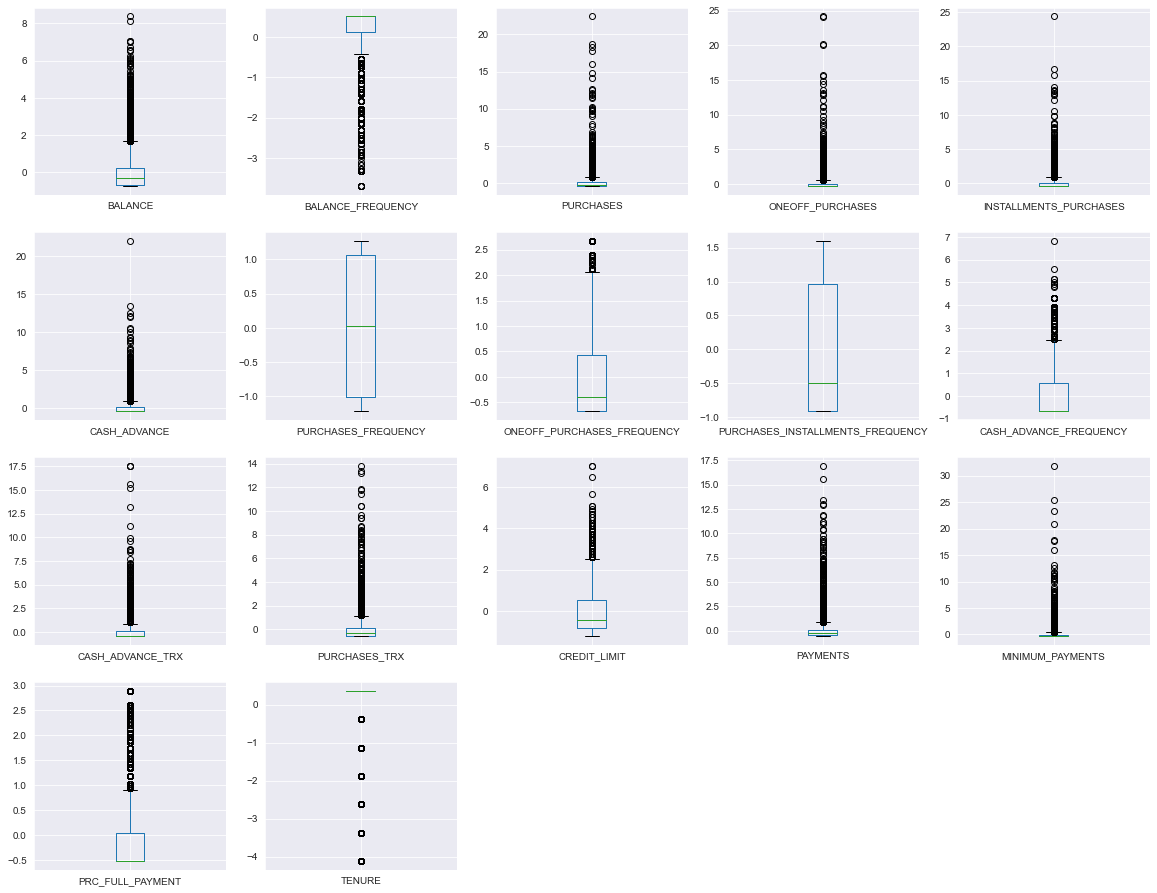

In [53]:
df.plot(kind='box', subplots=True,layout = (5,5), figsize=(20, 20))
plt.show()

In [6]:
### DEFININDO DADOS DE TREINO
X = df.drop('CUST_ID', axis=1).copy()

In [7]:
# SALVAR OS NUMEROS REFERENTES A INERCIA E SILHUETA DO MODELO

inercia = []
silhueta = {}

for i in range(2, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    
    inercia.append(k_means.inertia_)
    
    silhueta[i] = silhouette_score(X, labels=k_means.labels_, metric='euclidean')

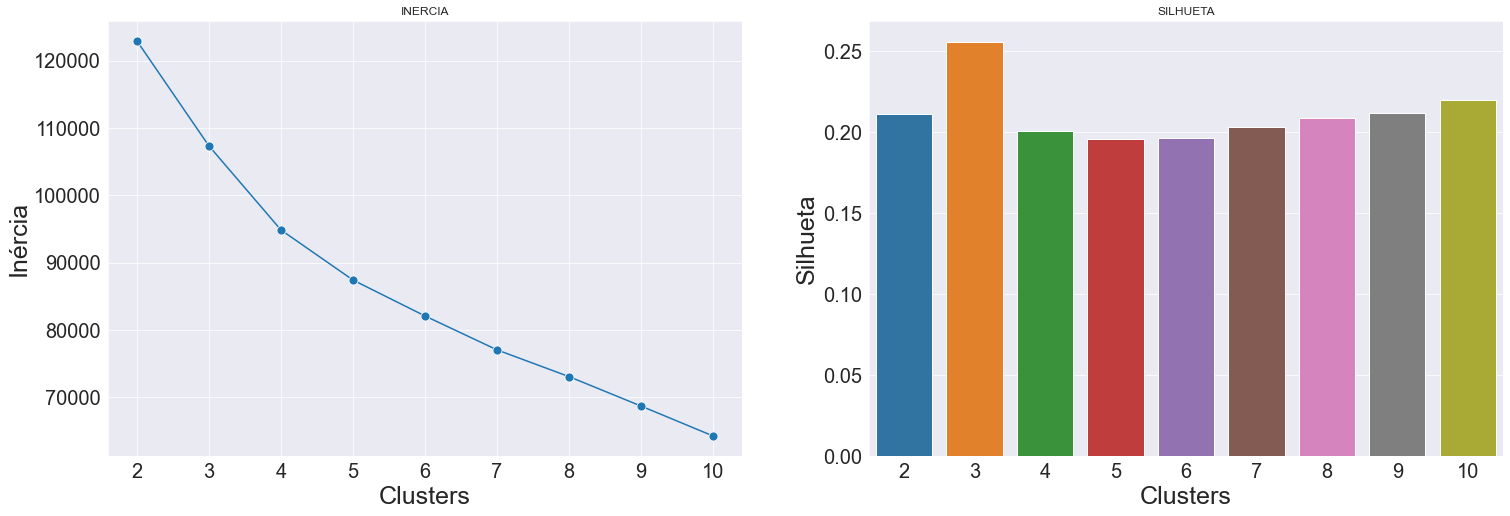

In [8]:
plt.figure(figsize=(25, 8))
sns.set_style("darkgrid")

plt.subplot(1, 2, 1)
plt.title('INERCIA')
sns.lineplot(x=range(2, 11), y=inercia, marker='o', markersize=9)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Inércia', fontsize=25)

plt.subplot(1, 2, 2)
plt.title('SILHUETA')
sns.barplot(x=list(silhueta.keys()), y=list(silhueta.values()))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Clusters', fontsize=25)
plt.ylabel('Silhueta', fontsize=25)

plt.show()

### IREI UTILIZAR 3 CLUSTERS POIS É UM PONTO DE GRANDE QUEDA DA INÉRCIA MANTENDO UM BOM NÍVEL DE SILHUETA

In [9]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
pred = k_means.predict(X)

df['K_distribution'] = pred

## Hora de fazer algumas visuzalizações da distribuição dos dados

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'K_distribution'],
      dtype='object')

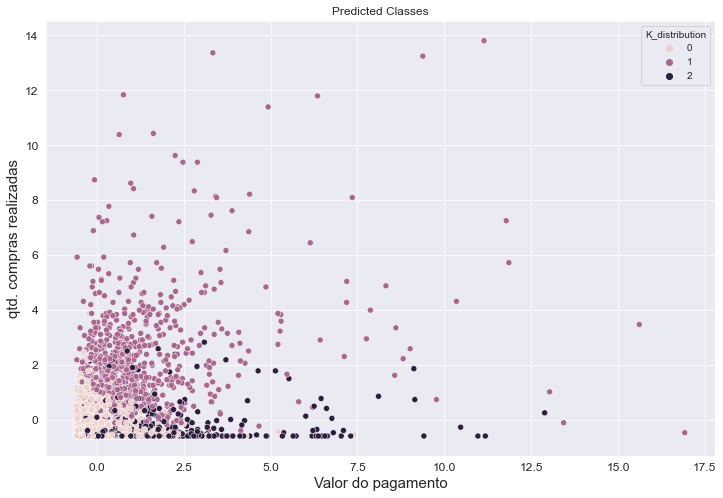

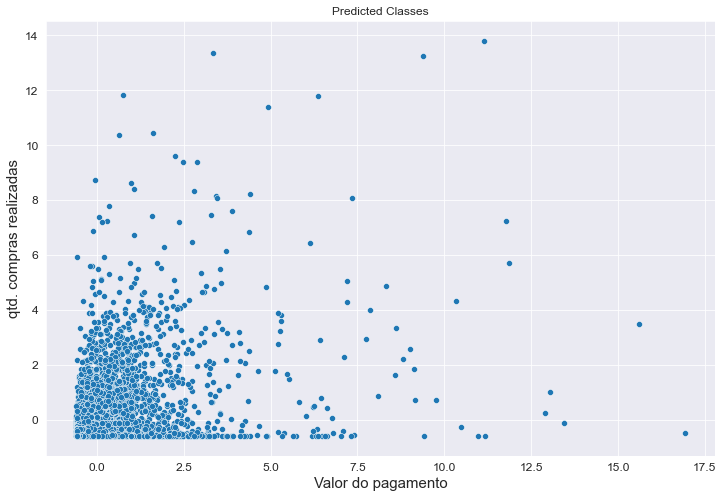

In [22]:
plt.figure(figsize=(12, 8))
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='PAYMENTS', y='PURCHASES_TRX', hue='K_distribution')
plt.xlabel('Valor do pagamento', fontsize=15)
plt.ylabel('qtd. compras realizadas', fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig('nao_clusterizado.jpg')
plt.show()


plt.figure(figsize=(12, 8))
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='PAYMENTS', y='PURCHASES_TRX')
plt.xlabel('Valor do pagamento', fontsize=15)
plt.ylabel('qtd. compras realizadas', fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig('nao_clusterizado.jpg')
plt.show() 

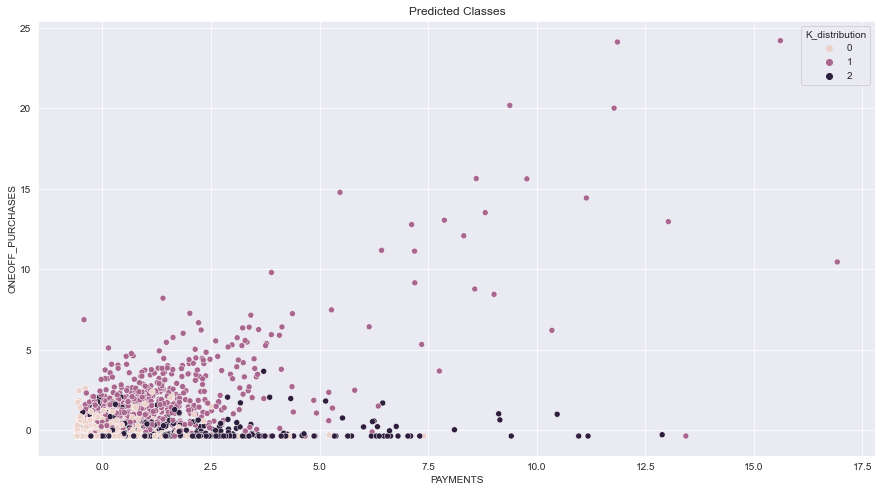

In [87]:
plt.figure(figsize=(15, 8))
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='PAYMENTS', y='ONEOFF_PURCHASES', hue='K_distribution')
plt.show()

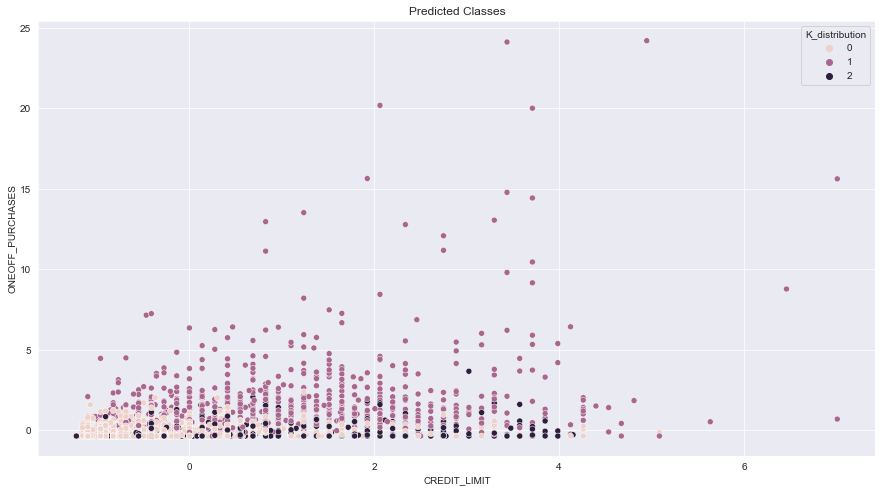

In [89]:
plt.figure(figsize=(15, 8))
plt.title('Predicted Classes')
sns.scatterplot(data=df,x='CREDIT_LIMIT', y='ONEOFF_PURCHASES', hue='K_distribution')
plt.show()